In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.6/332.0 MB 14.4 MB/s eta 0:00:23
    --------------------------------------- 5.2/332.0 MB 13.5 MB/s eta 0:00:25
    --------------------------------------- 7.3/332.0 MB 12.6 MB/s eta 0:00:26
   - -------------------------------------- 10.2/332.0 MB 12.8 MB/s eta 0:00:26
   - -------------------------------------- 11.0/332.0 MB 11.1 MB/s eta 0:00:30
   - -------------------------------------- 12.6/332.0 MB 10.3 MB/s eta 0:00:31
   - -------------------------------------- 13.9/332.0 MB 10.0 MB/s eta 0:00:32
   - -------------------------------------- 15.7/332.0 MB 9.7 MB/s eta 0:00:33
   -- ------------------------------------- 17.3/332.0 MB 9.5 MB/s eta 0:00:34
   -- ------------------------------------- 19.1/332.0 MB 9.4 MB/s eta 0:00:34
   -- ------------------------------------- 21.0/332.0 MB 9.3 MB/s eta 0:00:34
   -- ------------------------------------- 22.8/332.0 M

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
#load dataset

train_dir=r"D:\Python AI Course\coding\Rice_Image_Dataset"
test_dir=r"D:\Python AI Course\coding\Rice_Image_Dataset"

In [5]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128,128),
    batch_size=32
)

val_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128,128),
    batch_size=32
)

test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size=(128,128),
    batch_size=32
)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.
Found 75000 files belonging to 5 classes.


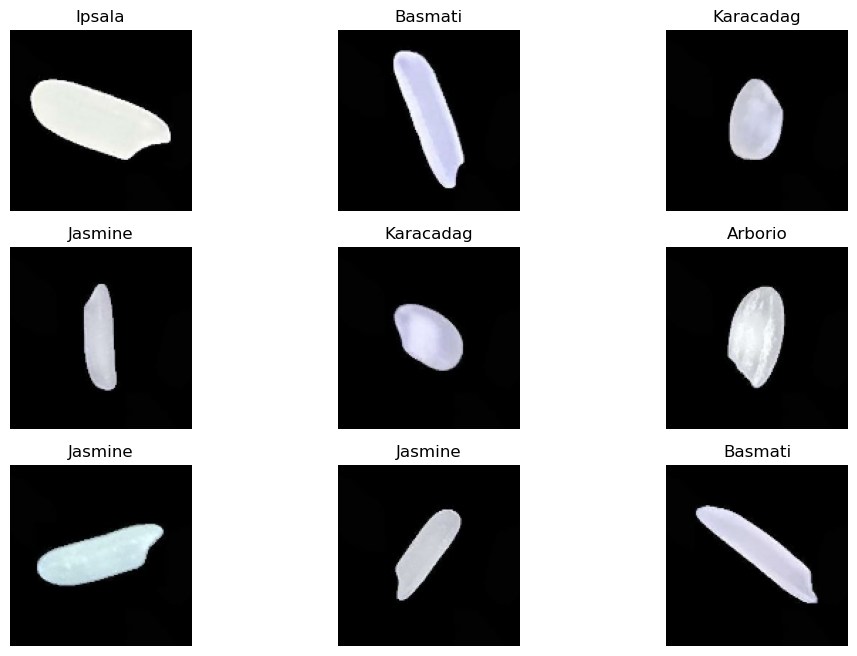

In [6]:
"""  Scaling Normalization  """  #pixel are scaling between 0 and 1 instead of 255

train_ds=train_ds.map(lambda x,y:(x/255.0,y))
val_ds=val_ds.map(lambda x,y:(x/255.0,y))
test_ds=test_ds.map(lambda x,y:(x/255.0,y))

class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

for images, labels in train_ds:  
    plt.figure(figsize=(12, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_index = labels[i].numpy()
        if label_index.ndim > 0: 
            label_index = np.argmax(label_index)
        plt.title(class_names[int(label_index)])
        plt.axis("off")
    plt.show()
    break
    

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])

In [8]:
"""# Model compile"""

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history  = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1433s 763ms/step - accuracy: 0.9737 - loss: 0.0839 - val_accuracy: 0.8475 - val_loss: 0.5364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1280s 683ms/step - accuracy: 0.9852 - loss: 0.0460 - val_accuracy: 0.9779 - val_loss: 0.0708
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1226s 654ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9747 - val_loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1218s 650ms/step - accuracy: 0.9858 - loss: 0.0441 - val_accuracy: 0.9385 - val_loss: 0.1936
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1239s 659ms/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9499 - val_loss: 0.1821
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1442s 744ms/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9947 - val_loss: 0.0151
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24379s 13s/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9396 - val_loss: 0.3068
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1243s 662ms/st

In [9]:
model.save("Rice_cnn.h5")

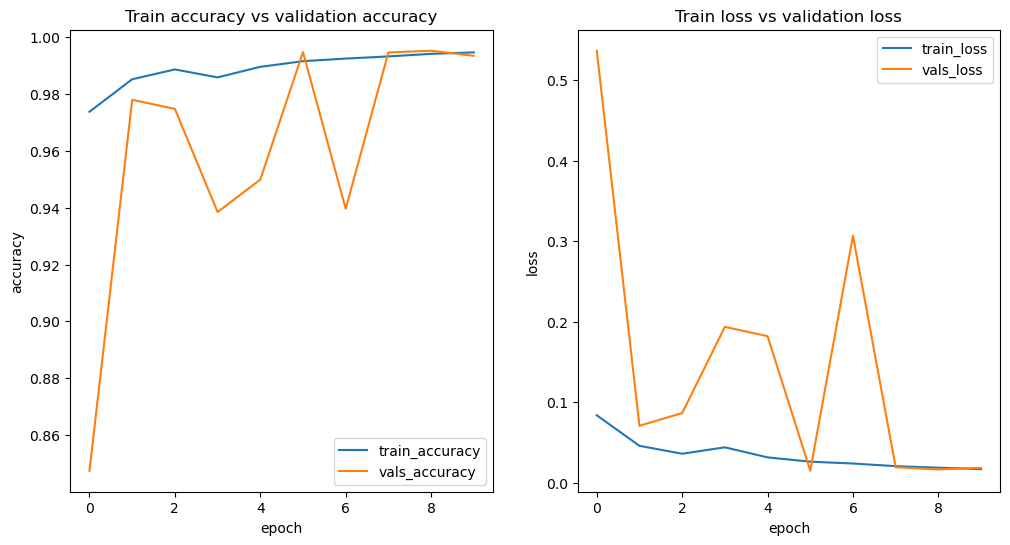

In [10]:
# plot accuracy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label = "train_accuracy")
plt.plot(history.history["val_accuracy"],label = "vals_accuracy")
plt.title("Train accuracy vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

# plot loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label = "train_loss")
plt.plot(history.history["val_loss"],label = "vals_loss")
plt.title("Train loss vs validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [11]:
# new data prediction
from tensorflow.keras.models import load_model

model = load_model("Rice_cnn.h5")

import tensorflow as tf

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


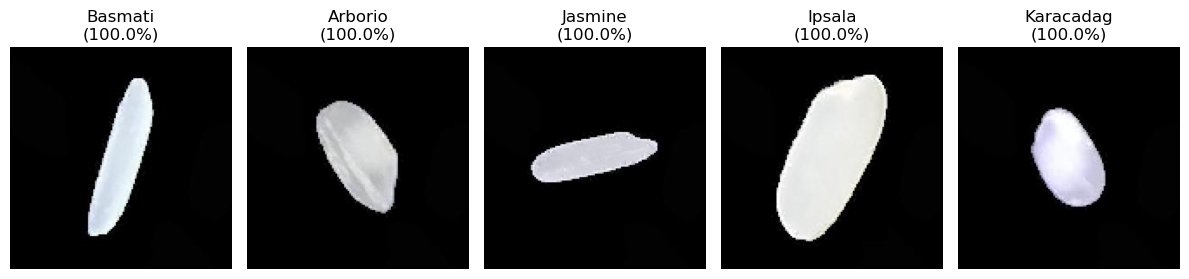

In [26]:
#manually given image paths

# Class names
class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

# Image paths
img_paths = [
     r"D:\Python AI Course\coding\Rice_Image_Dataset\Basmati\basmati (106).jpg",
     r"D:\Python AI Course\coding\Rice_Image_Dataset\Arborio\Arborio (55).jpg",
     r"D:\Python AI Course\coding\Rice_Image_Dataset\Jasmine\Jasmine (134).jpg",
     r"D:\Python AI Course\coding\Rice_Image_Dataset\Ipsala\Ipsala (328).jpg",
     r"D:\Python AI Course\coding\Rice_Image_Dataset\Karacadag\Karacadag (169).jpg"
]

# Load and preprocess images
images = []
for path in img_paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(128,128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    images.append(img_array)

# Stack all images
images = np.vstack(images)

# Predict (replace 'model' with your trained model variable)
predictions = model.predict(images)

# Plot all 5 predictions
plt.figure(figsize=(12, 4))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(tf.keras.preprocessing.image.load_img(img_paths[i], target_size=(128,128)))
    pred_index = np.argmax(predictions[i])
    confidence = np.max(predictions[i]) * 100
    plt.title(f"{class_names[pred_index]}\n({confidence:.1f}%)")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


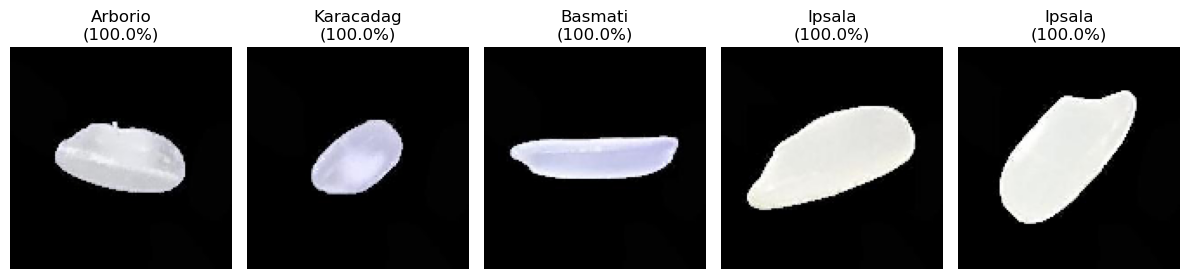

In [31]:
#pick random images automatically from the dataset

import os
import random

# Define dataset directory and class names
dataset_dir = r"D:\Python AI Course\coding\Rice_Image_Dataset"
class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

# Pick 5 random images from all class folders
image_paths = []
for _ in range(5):
    random_class = random.choice(class_names)
    class_folder = os.path.join(dataset_dir, random_class)
    random_image = random.choice(os.listdir(class_folder))
    image_paths.append(os.path.join(class_folder, random_image))

# Load and preprocess images
images = []
for path in image_paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(128,128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    images.append(img_array)

# Stack all images together for batch prediction
images = np.vstack(images)

# Predict (replace 'model' with your trained model variable)
predictions = model.predict(images)

# Plot all 5 predictions
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(tf.keras.preprocessing.image.load_img(image_paths[i], target_size=(128,128)))
    pred_index = np.argmax(predictions[i])
    confidence = np.max(predictions[i]) * 100
    plt.title(f"{class_names[pred_index]}\n({confidence:.1f}%)")
    plt.axis('off')

plt.tight_layout()
plt.show()
